# Fermions on the lattice - The Gross-Neveu model in 1+1D

## Introduction

The discretized Euclidean action for the Gross-Neveu model with $N_{f} = 2$ Wilson fermions after the Hubbard-Stratonovich transformation is given by
\begin{equation}
    \boxed{
    S[\sigma]
    =
    \sum_{n \in \varLambda} \left(\frac{\sigma^{2}(n)}{g^{2}}\right)
    - \log{\det{\left(M^{\dagger}[\sigma] M[\sigma]\right)}},
    \quad
    M[\sigma]
    =
    D_{W} + m + \sigma
    }
\end{equation}
where $\sigma(n)$ is a real scalar field, $g^{2}$ is the coupling strength, and
\begin{equation}
    \left(D_{W}\psi\right)(n)
    =
    2 \psi(n)
    + \frac{1}{2} \sum_{\mu = 0, 1} (\gamma^{\mu} - 1)\psi(n + \hat{\mu}) - (\gamma^{\mu} + 1)\psi(n - \hat{\mu}), \qquad \gamma^{0} = \sigma^{x}, \gamma^{1} = \sigma^{y}.
\end{equation}

## 1. Building the matrix

Evaluating the action requires computing $\log \det{\left(M^{\dagger}[\sigma] M[\sigma]\right)}$ for different configurations $\sigma$. \
There are several approaches to deal with this computation, but here we will take the simplest one, which consists of explicitly building the matrix $M[\sigma]$, compute the matrix product $M^{\dagger}[\sigma] M[\sigma]$, and finally get the logarithm of the determinant.

As a first step, in this exercise we focus on building the part of $M$ that is independent of $\sigma$:
\begin{equation}
    D_{W} + m.
\end{equation}
Since the action of $D_{W}$ on the 2-component spinors $\psi(n_{t}, n_{x})$ is a linear combination of spinors at different lattice sites
\begin{equation}
    \left(D_{W}\psi\right)(n)
    =
    2 \psi(n)
    + \frac{1}{2} \sum_{\mu = 0, 1} (\gamma^{\mu} - 1)\psi(n + \hat{\mu}) - (\gamma^{\mu} + 1)\psi(n - \hat{\mu}), \quad \gamma^{0} = \sigma^{x}, \quad \gamma^{1} = \sigma^{y};
\end{equation}
we can turn this operator into a matrix by arranging the fermions into a vector
\begin{equation}
    \left( \psi(0, 0), \psi(0, 1), \dots, \psi(0, L - 1), \psi(1, 0), \psi(1, 1), \dots \right),
\end{equation}
where $L_{t} = L_{x} = L$ is the number of sites; and then building a matrix where the first “row” represents the action of $D_{W}$ on $\psi(0, 0)$, the second row on $\psi(0, 1)$ and so on.

Note that, since each spinor has two components, the size of the resulting matrix will be $(2 L^{2}) \times (2 L^{2})$.

Finally, we also need to specify what happens on the boundaries:
* We impose periodic boundary conditions in space, so $\psi(n_{t}, L) = \psi(n_{t}, 0)$.
* We impose **anti-periodic boundary conditions in time**, meaning that $\psi(L, n_{x}) = -\psi(0, n_{x})$.

As an example, consider a lattice of size 3 x 3 with the following vector of fermions
\begin{equation}
    \left( \psi(0, 0), \psi(0, 1), \psi(0, 2), \psi(1, 0), \psi(1, 1), \psi(1, 2), \psi(2, 0), \psi(2, 1), \psi(2, 2) \right).
\end{equation}
The first “row” of the matrix will represent $D_{W}\psi(0, 0)$, which is given by
\begin{equation}
    \begin{aligned}
        \left(D_{W} \psi \right)(0, 0) & = 2 \psi(0, 0) \\
        & \hphantom{=} + \frac{1}{2} (\sigma^{x} - 1) \psi(1, 0) - \frac{1}{2}(\sigma^{x} + 1) \psi(-1, 0) \quad (\mu = 0) \\
        & \hphantom{=} + \frac{1}{2} (\sigma^{y} - 1) \psi(0, 1) - \frac{1}{2}(\sigma^{y} + 1) \psi(0, -1) \quad (\mu = 1).
    \end{aligned}
\end{equation}
Then, since we have terms that have crossed the boundary, we replace $\psi(-1, 0) = -\psi(2, 0)$ (anti-periodic) and $\psi(0, -1) = \psi(0, 2)$ (periodic), leading to
\begin{equation}
    \begin{aligned}
        \left(D_{W} \psi \right)(0, 0) & = 2 \psi(0, 0) \\
        & \hphantom{=} + \frac{1}{2} (\sigma^{x} - 1) \psi(1, 0) + \frac{1}{2}(\sigma^{x} + 1) \psi(2, 0) \quad (\mu = 0) \\
        & \hphantom{=} + \frac{1}{2} (\sigma^{y} - 1) \psi(0, 1) - \frac{1}{2}(\sigma^{y} + 1) \psi(0, 2) \quad (\mu = 1).
    \end{aligned}
\end{equation}
Now, we identify the positions of $\psi(0, 0), \psi(1, 0), \psi(2, 0), \psi(0, 1), \psi(0, 2)$ in our vector, which are $1, 4, 7, 2, 3$, respectively, and fill these columns in the row with the respective terms:
\begin{equation}
    \begin{pmatrix}
        2 & \frac{1}{2}(\sigma^{y} - 1) & -\frac{1}{2}(\sigma^{y} + 1) & \frac{1}{2}(\sigma^{x} - 1) & 0 & 0 & \frac{1}{2}(\sigma^{x} + 1) & 0 & 0 \\
        \vdots & \ddots & & & & & & & \vdots
    \end{pmatrix}
\end{equation}

So what do you have to do here?

In the code below you must fill the given matrix just as in the example above. \
You can do that by:
1. Iterating over the $\psi(n)$ at each lattice site.
2. Identifying the columns of the fermions that appear in $D_{W}\psi$ for each $\psi(n)$.
3. Filling out the corresponding columns with the $2 \times 2$ matrices defined at the beginning of the function.
4. Don't forget to take into account periodic and anti-periodic boundary conditions where necessary.

We have defined the variable `Dm_matrix` such that you only need to access its “rows” and “columns” as `Dm_matrix[row][col]`, and at each of these entries you can input a $2 \times 2$ matrix just as in the example. \
The final line of code with `np.swapaxes` takes care of returning a $(2 L^{2}) \times (2 L^{2})$ matrix.

**Important remarks**
* In the expression $2 \psi(n)$, the 2 represents a unit $2 \times 2$ matrix multiplied by 2.
* Similarly, $\sigma^{x} + 1$ means adding the $2 \times 2$ unit matrix to the Pauli matrix $\sigma^{x}$.
* The mass $m$ can be included in the matrix by simply replacing $2$ with $2 + m$.

**Note:**
You are also welcome to write your own algorithm to build the matrix, just make sure that the name of the function and its arguments stay the same.

In [94]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def get_dm_matrix(lattice_sites: int, mass: float) -> np.ndarray:
    sigma_x = np.array([[0., 1.], [1., 0.]]).astype(np.complex128)
    sigma_y = np.array([[0., -1j], [1j, 0.]])
    unit_2d = np.array([[1., 0.], [0., 1.]])

    Dm_matrix = np.zeros(shape=(lattice_sites ** 2, lattice_sites ** 2, 2, 2), dtype=np.complex128)

    # TODO: Start filling here the Dm_matrix.
    for t in range(lattice_sites): #time
        for x in range(lattice_sites): #spatial

            n = t * lattice_sites + x  
            Dm_matrix[n, n] = (2 + mass)* unit_2d #start the matrix with the constant term 

            neighs = { #this is a dictionary: for each time, compute the sigma_x block (corresponding to mu = 0)
                (t+1) % lattice_sites: 1/2*(sigma_x - unit_2d),   # +0 direction
                (t-1) % lattice_sites: -1/2*(sigma_x + unit_2d), # -0 direction 
            }
            # apply anti periodic condition for t
            if t == lattice_sites - 1:   # (L to 0)
                neighs[(0)] = -(sigma_x - unit_2d)/2
            if t == 0:                   # (0 to L)
                neighs[(lattice_sites-1)] = +(sigma_x + unit_2d)/2

            for t2, block in neighs.items(): # fill the blocks in the matrix at the correct column 
                col = t2 * lattice_sites + x  #compute the columns
                Dm_matrix[n, col] = block

            # periodic spatial boundary conditions for spatial x
            # this is used to compute the column for mu = 1
            xp = (x+1) % lattice_sites
            xm = (x-1) % lattice_sites
            # +1 direction 
            col = t * lattice_sites + xp
            Dm_matrix[n, col] = 1/2*(sigma_y - unit_2d)
            # -1 direction 
            col = t * lattice_sites + xm
            Dm_matrix[n, col] = -1/2*(sigma_y + unit_2d)

    # TODO: This should be just before the return, there is no need to change this.
    Dm_matrix = np.swapaxes(Dm_matrix, axis1=1, axis2=2).reshape(
        (2 * (lattice_sites ** 2), 2 * (lattice_sites ** 2)))

    return Dm_matrix

#### Checkpoint

Verify that you have built the matrix correctly by running the cell below. \
This checks that the sum of the eigenvalues is real up to machine precision (a property that our matrix has by construction), and that the logarithm of the determinant matches a tested value. \
If the cell runs without errors, you can proceed to the next part.

In [103]:
test = get_dm_matrix(lattice_sites=8, mass=0.1)
eigs_sum = np.sum(np.linalg.eigvals(test))
assert np.isclose(eigs_sum.imag, b=0, rtol=0., atol=1e-12), "Imaginary part is not close to zero."
assert np.isclose(np.linalg.slogdet((test.conj().T @ test))[1], b=196.5166388, rtol=0., atol=1e-5), \
    "Incorrect value for log determinant."
print("All good!")

All good!


## 2. Setting up the Metropolis algorithm

The cell below contains the usual parts of the Metropolis algorithm we have seen so far.

In [97]:
def compute_action(sigma: np.ndarray, mass: float, coupling2: float):
    M_matrix = get_dm_matrix(lattice_sites=sigma.shape[0], mass=mass)
    M_matrix.flat[::M_matrix.shape[0] + 1] += np.repeat(sigma.flatten(), repeats=2)
    log_det = (np.linalg.slogdet(M_matrix.conj().T @ M_matrix)[1]).real
    action = (np.sum(sigma ** 2) / coupling2) - log_det
    return action


def propose_sigma(sigma: np.ndarray, width: float, rng: np.random.Generator):
    return sigma + rng.normal(loc=0., scale=width, size=sigma.shape)


def metropolis_step(sigma: np.ndarray,
                    mass: float,
                    coupling2: float,
                    width: float,
                    rng: np.random.Generator):
    # 1. Proposal
    proposed_sigma = propose_sigma(sigma, width, rng)

    # 2. Acceptance probability.
    current_action = compute_action(sigma, mass=mass, coupling2=coupling2)
    proposed_action = compute_action(proposed_sigma, mass=mass, coupling2=coupling2)
    p_acceptance = np.min([1.0, np.exp(current_action - proposed_action)])

    # 3. Accept / reject
    r = rng.random()

    if r <= p_acceptance:  # Accept.
        return proposed_sigma, 1

    # Reject.
    return sigma, 0


def sample_field(initial_sigma: np.ndarray,
                 num_samples: int,
                 mass: float,
                 coupling2: float,
                 width: float,
                 rng: np.random.Generator):
    chain = [initial_sigma]
    acceptance = []

    for _ in range(num_samples):
        sigma, accepted = metropolis_step(sigma=chain[-1],
                                          mass=mass,
                                          coupling2=coupling2,
                                          width=width,
                                          rng=rng)
        chain.append(np.copy(sigma))
        acceptance.append(accepted)

    return chain, acceptance

### 2.1. Understanding the implementation

In the function `compute_action` above, your implementation of the function `get_dm_matrix` is called, after which the following two lines compute the relevant contribution to the action:
```python
M_matrix.flat[::M_matrix.shape[0] + 1] += np.repeat(sigma.flatten(), repeats=2)
log_det = (np.linalg.slogdet(M_matrix.conj().T @ M_matrix)[1]).real
```
* In the first line:
    * For a 2d array `M_matrix`, what does `M_matrix.flat[::M_matrix.shape[0] + 1]` do?
    * Why do we repeat twice each value of `sigma` with `np.repeat(sigma.flatten(), repeats=2)`?
* In the second line:
    * What does the function `np.linalg.slogdet` do? (In a few words, not the technical implementation).
      What does it return? Is it clear why we take the second returned argument `[1]`?

### 2.2. Tuning the proposal function

For $L = 8, g^{2} = 1.0$ and $m = -2.1$, find the width that gives an acceptance of 60-70%.

In [107]:
L = 8
g2 = 1.0
m = -2.1
my_width = 0.07
my_rng = np.random.default_rng(seed=42)
samples, acceptances = sample_field(initial_sigma=my_rng.normal(size=(L, L)),
                                    num_samples=1_000,
                                    mass=m,
                                    coupling2=g2,
                                    width=my_width,
                                    rng=my_rng)
print(f"Acceptance: {np.mean(acceptances) * 100:.2f}%")

Acceptance: 66.00%


## 3. The Chiral condensate

In the lectures, you saw that the Wilson discretization explicitly breaks chiral symmetry. \
Due to this, certain quantities need to be measured at the _chiral limit_, i.e., the limit in which chiral symmetry is approximately recovered. \
For the Gross-Neveu model, this can be done by fine-tuning the bare mass $m$ to a critical value $m_{c}$. \
In this exercise, we will try to find this critical value by studying the behavior of the _chiral condensate_.

The chiral condensate is a fermionic observable given by the average $\langle \overline{\psi} \psi(n) \rangle$ and, after applying the Hubbard-Stratonovich transformation, it can also be computed as
\begin{equation}
    \langle \overline{\psi} \psi(n) \rangle = \frac{1}{g^{2}} \langle \sigma(n) \rangle.
\end{equation}
This relation holds for each lattice site, but in practice one measures instead the _global condensate_
\begin{equation}
    \langle \overline{\psi} \psi \rangle = \frac{1}{g^{2}} \left\langle \frac{1}{L^{2}} \sum_{n \in \varLambda} \sigma(n) \right\rangle.
\end{equation}
In what follows, we will understand how to find the critical value of the mass by measuring the global chiral condensate for different values of the mass.

### 3.1. Generating samples

Using a lattice of size $L = 8$, a squared coupling $g^{2} = 1.0$, and the width that you found in 2.2, generate >10,000 samples for each value of $m$ given below.

In [108]:
L = 8
g2 = 1.0
my_width = 0.07
my_rng = np.random.default_rng(seed=42)
m_vals = np.linspace(start=-2.4, stop=-1.6, num=11)
data_dict = {}
for m_val in m_vals:
    samples, acceptances = sample_field(initial_sigma=my_rng.normal(size=(L, L)),
                                        num_samples=15_000,
                                        mass=m_val,
                                        coupling2=g2,
                                        width=my_width,
                                        rng=my_rng)
    data_dict[f"{m_val:.2f}"] = samples
    print(f"Mass: {m_val:.2f}\tAcceptance: {np.mean(acceptances) * 100:.2f}%.\t"
          f"Est val: {np.mean([np.mean(sample) for sample in samples][500:]):.2f}")

Mass: -2.40	Acceptance: 67.33%.	Est val: -0.48
Mass: -2.32	Acceptance: 66.67%.	Est val: -0.38
Mass: -2.24	Acceptance: 68.06%.	Est val: -0.41
Mass: -2.16	Acceptance: 68.83%.	Est val: -0.33
Mass: -2.08	Acceptance: 68.49%.	Est val: -0.24
Mass: -2.00	Acceptance: 69.28%.	Est val: 0.07
Mass: -1.92	Acceptance: 66.80%.	Est val: 0.15
Mass: -1.84	Acceptance: 66.67%.	Est val: 0.30
Mass: -1.76	Acceptance: 67.73%.	Est val: 0.40
Mass: -1.68	Acceptance: 67.51%.	Est val: 0.40
Mass: -1.60	Acceptance: 67.91%.	Est val: 0.46


#### Checkpoint

Since generating data can take a while, feel free to use the following cell to save or load your data

In [111]:
do_file = "save"
filename = "gn_mass_data.npz"

if do_file == "save":
    np.savez(filename, **data_dict)
elif do_file == "load":
    data_dict = np.load(filename, allow_pickle=True)
    data_dict = {f"{data_key}": data_val.tolist() for data_key, data_val in data_dict.items()}
else:
    raise ValueError("Option not recognized")

### 3.2. Measuring the condensate

For every set of samples obtained:
1. Measure the global condensate for each sample.
2. Check the chain for thermalization and remove samples if necessary.
3. Obtain an average of the global condensate and its estimated error.
4. Plot the global condensate as a function of $m$.

m = -2.40   <σ> = -0.4847 ± 0.0148
m = -2.32   <σ> = -0.3938 ± 0.0205
m = -2.24   <σ> = -0.4148 ± 0.0191
m = -2.16   <σ> = -0.3324 ± 0.0227
m = -2.08   <σ> = -0.2473 ± 0.0236
m = -2.00   <σ> = 0.0538 ± 0.0406
m = -1.92   <σ> = 0.1690 ± 0.0169
m = -1.84   <σ> = 0.3020 ± 0.0239
m = -1.76   <σ> = 0.3995 ± 0.0118
m = -1.68   <σ> = 0.4082 ± 0.0136
m = -1.60   <σ> = 0.4695 ± 0.0113
11 11


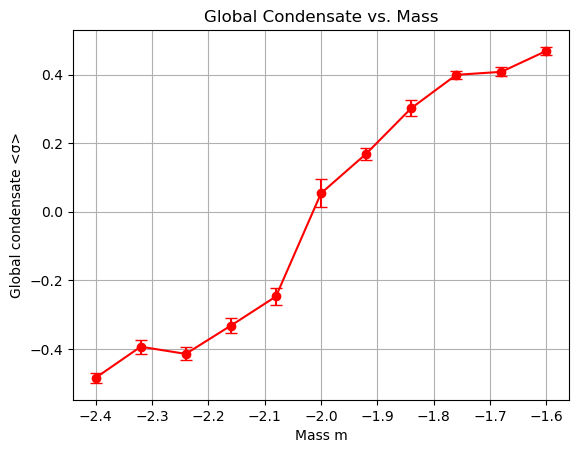

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = 8
g2 = 1.0

do_file = "load"
filename = "gn_mass_data.npz"

if do_file == "save":
    np.savez(filename, **data_dict)
elif do_file == "load":
    data_dict = np.load(filename, allow_pickle=True)
    data_dict = {f"{data_key}": data_val.tolist() for data_key, data_val in data_dict.items()}
else:
    raise ValueError("Option not recognized")

def compute_condensates(samples: list[np.ndarray], g2: float) -> np.ndarray:
    return 1/g2*np.array([np.mean(s) for s in samples])

def thermalize(condensates: np.array, fraction: float = 0.1): 
    cut = int(fraction * len(condensates))
    return condensates[cut:]

def binning_error(data: np.ndarray, min_bin: int = 20) -> float:
    N = len(data)
    b = 1
    errors = []

    while N // b >= min_bin:
        binned = data[: (N // b) * b].reshape(-1, b).mean(axis=1)
        errors.append(np.std(binned) / np.sqrt(len(binned)))
        b *= 2

    return errors[-1] 

condensates_dict = {}
mean_vals = []
err_vals = []

m_vals = np.linspace(start=-2.4, stop=-1.6, num=11)

for key, samples in data_dict.items():
    condensates = compute_condensates(samples, g2)
    condensates_th = thermalize(condensates)

    mean = np.mean(condensates_th)
    err  = binning_error(condensates_th)

    mean_vals.append(mean)
    err_vals.append(err)
    m_val = float(key)
    print(f"m = {m_val:.2f}   <σ> = {mean:.4f} ± {err:.4f}")

plt.errorbar(m_vals, mean_vals, yerr=err_vals, fmt='o-', capsize=4, c = "r")
plt.xlabel("Mass m")
plt.ylabel("Global condensate <σ>")
plt.title("Global Condensate vs. Mass")
plt.grid(True)
plt.show()

### Questions

* In the plot of the condensate as a function of the mass, what do you observe?
* For values of $m$ such that the condensate is close to zero, can you identify what happens? \
    Looking at the values of the observable at each Monte Carlo step might help.